In [2]:
# Import Libraries
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
from pprint import pprint

# Import The Movie Dataset CSVs into Dataframes
credits_df = pd.read_csv("Resources/credits.csv")
keywords_df = pd.read_csv("Resources/keywords.csv")
links_small_df = pd.read_csv("Resources/links_small.csv")
links_df = pd.read_csv("Resources/links.csv")
movies_df = pd.read_csv("Resources/movies_metadata.csv")
ratings_small_df = pd.read_csv("Resources/ratings_small.csv")
ratings_df = pd.read_csv("Resources/ratings.csv")

C:\Users\flash\AppData\Local\Temp\ipykernel_7892\1349938314.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("Resources/movies_metadata.csv")


In [ ]:
# Setting OMDB query param for looking up IMDb IDs
omdb_api_key = "XXXXXXXX"
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=" + omdb_api_key

<font size = '5'>Question 1: What are the most common movie genres released over the years?</font>


In [ ]:
#drop columns that are not needed

cleaned_movies_df= movies_df.drop(columns=["adult", "belongs_to_collection",
                "homepage","original_language",
                "overview","poster_path",
                "spoken_languages","title","tagline",
                "production_companies","production_countries",
                "video"])

#convert release date to datetime format
cleaned_movies_df["release_date"]=pd.to_datetime(cleaned_movies_df["release_date"], errors="coerce")
cleaned_movies_df["release_date"]=cleaned_movies_df["release_date"].dt.year

cleaned_movies_df=cleaned_movies_df.dropna() #drop rows with missing values
cleaned_movies_df=cleaned_movies_df.dropna(axis=1) #drop columns with missing values

#covert genres column from a list
cleaned_movies_df["genres"]=cleaned_movies_df["genres"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)
cleaned_movies_df.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995.0,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995.0,262797249.0,104.0,Released,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.7129,1995.0,0.0,101.0,Released,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,Released,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,Released,5.7,173.0


In [ ]:
# Convert Genres column from a dictionary to a list and fill NAN with empty List
cleaned_movies_df["genres"] = cleaned_movies_df["genres"].apply(
    lambda x: x if isinstance(x, list) else []
)

cleaned_movies_df["genres"]=cleaned_movies_df["genres"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

cleaned_movies_df.head()


,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,21.946943,1995.0,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,Jumanji,17.015539,1995.0,262797249.0,104.0,Released,6.9,2413.0
2,0,"[Romance, Comedy]",15602,tt0113228,Grumpier Old Men,11.7129,1995.0,0.0,101.0,Released,6.5,92.0
3,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,Released,6.1,34.0
4,0,[Comedy],11862,tt0113041,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,Released,5.7,173.0


In [ ]:
#filter movies released after 2009

last_decade_movies_df=cleaned_movies_df[(cleaned_movies_df["release_date"].notna()) & #removes NAN years/values
                                        (cleaned_movies_df["release_date"]>=2009) &
                                        (cleaned_movies_df["release_date"]<2020)] #filters movies released after 2010



# Flatten the 'genres' list and count occurrences
genre_counts = last_decade_movies_df['genres'].explode().value_counts()

# Create a DataFrame with the genre counts
genre_counts_df = pd.DataFrame(genre_counts).reset_index()
genre_counts_df.columns = ['genre', 'count']
genre_counts_df.head(20)


,genre,count
0,Drama,5854
1,Comedy,3970
2,Thriller,2703
3,Documentary,2087
4,Action,1856
5,Romance,1654
6,Horror,1554
7,Crime,1052
8,Science Fiction,920
9,Adventure,905


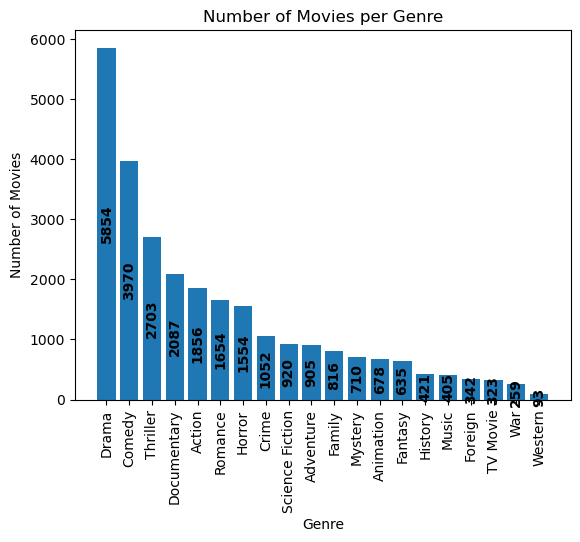

In [ ]:
#number of movies per genre released over the years

plt.bar(genre_counts_df["genre"], genre_counts_df["count"])
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")

# Add the exact y-axis number on each bar
for i, c in enumerate(genre_counts_df['count']):
    plt.text(i, c / 2, str(c), ha='center', va='center', color='black', fontweight='bold', rotation=90)

plt.xticks(rotation=90)
plt.show()


In [ ]:
final_movies=cleaned_movies_df[['id','original_title','vote_average', 'runtime']]
final_movies.head(20)


,id,original_title,vote_average,runtime
0,862,Toy Story,7.7,81.0
1,8844,Jumanji,6.9,104.0
2,15602,Grumpier Old Men,6.5,101.0
3,31357,Waiting to Exhale,6.1,127.0
4,11862,Father of the Bride Part II,5.7,106.0
5,949,Heat,7.7,170.0
6,11860,Sabrina,6.2,127.0
7,45325,Tom and Huck,5.4,97.0
8,9091,Sudden Death,5.5,106.0
9,710,GoldenEye,6.6,130.0


In [ ]:
#create a dataframe of the top 10 genres per year released

#explode the genres column which is in a list format to a row format
genre_explode=last_decade_movies_df.explode("genres")

#grouping by release date and genre to get the count of each genre per year
genre_explode=genre_explode.groupby(["release_date","genres"]).size().reset_index(name="count")

genre_explode=genre_explode.sort_values(by=["release_date","count"], ascending=[True,False])

#group by release date and get the top 10 genres per year
genre_explode=genre_explode.groupby("release_date").head(10)

#reset index
genre_explode=genre_explode.reset_index(drop=True)
genre_explode.head(20)


,release_date,genres,count
0,2009.0,Drama,694
1,2009.0,Comedy,468
2,2009.0,Thriller,345
3,2009.0,Action,242
4,2009.0,Documentary,218
5,2009.0,Romance,213
6,2009.0,Horror,184
7,2009.0,Adventure,127
8,2009.0,Crime,126
9,2009.0,Science Fiction,124


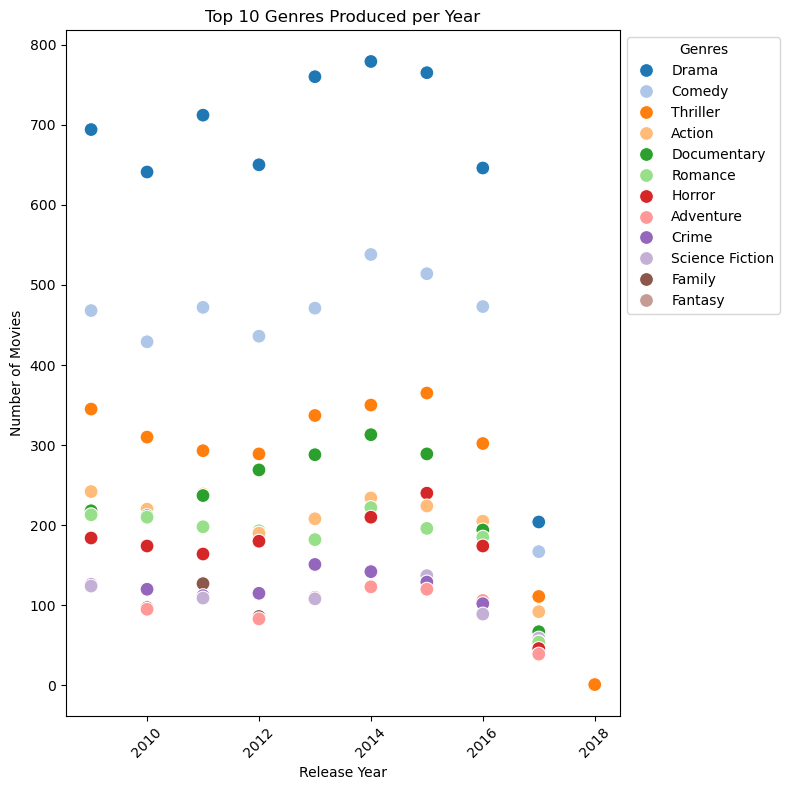

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create a scatter plot with Seaborn
sns.scatterplot(data=genre_explode, x="release_date", y="count", hue="genres", palette="tab20", s=100)

# Adding labels and title
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Top 10 Genres Produced per Year")
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Genres", bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [ ]:
# For each 'release_date', get the first (i.e., the genre with the lowest count)
lowest_genre_per_year = genre_explode.groupby("release_date").tail(1).reset_index(drop=True)

# Display the DataFrame
lowest_genre_per_year.head(10)


,release_date,genres,count
0,2009.0,Science Fiction,124
1,2010.0,Adventure,95
2,2011.0,Science Fiction,109
3,2012.0,Adventure,83
4,2013.0,Science Fiction,108
5,2014.0,Adventure,123
6,2015.0,Adventure,120
7,2016.0,Science Fiction,89
8,2017.0,Adventure,39
9,2018.0,Thriller,1


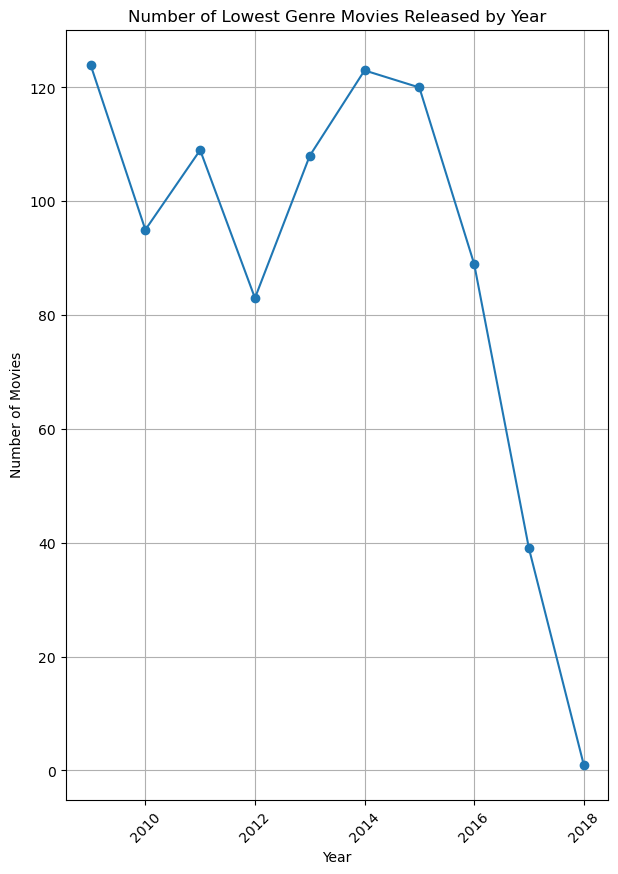

In [ ]:
plt.figure(figsize=(7, 10))
plt.plot(lowest_genre_per_year["release_date"], lowest_genre_per_year["count"], marker='o')
plt.title("Number of Lowest Genre Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid()
plt.show()





<font size = '5'>Question 2: Which directors have the highest average IMDb ratings across their films?</font>


In [ ]:
#Question_2_your_name - Which directors have the highest average IMDb ratings across their films?
#get the credits csv file
#Dropping Cast Column
clean_credits_df = credits_df.drop(columns = ["cast"])

#convert crew  from a list to rows
clean_credits_df["crew"]=clean_credits_df["crew"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)

# Fill NaN with empty lists
clean_credits_df["crew"] = clean_credits_df["crew"].apply(lambda x: x if isinstance(x, list) else [])


clean_credits_df.head()


,crew,id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
#extract the director from the crew column
def get_director(x):
    if isinstance(x,list):
        for i in x:
            if isinstance(i, dict)and i.get("job")=="Director":
                return i.get("name", "")
    return ""

#add director column to our original df
clean_credits_df["Director"]=clean_credits_df["crew"].apply(get_director)

# Check the results on a new dataframe to merge later
final_credits=clean_credits_df[["Director", "id"]]
final_credits.head()


,Director,id
0,John Lasseter,862
1,Joe Johnston,8844
2,Howard Deutch,15602
3,Forest Whitaker,31357
4,Charles Shyer,11862


In [ ]:
#get data from our ratings.csv file
#rename movieId to id to merge dataframes

cleaned_rating_df = ratings_df.drop(columns=["userId", "timestamp"])
cleaned_rating_df.rename(columns={'movieId':"id"}, inplace=True)

cleaned_rating_df.head(10)


,id,rating
0,110,1.0
1,147,4.5
2,858,5.0
3,1221,5.0
4,1246,5.0
5,1968,4.0
6,2762,4.5
7,2918,5.0
8,2959,4.0
9,4226,4.0


In [ ]:

final_movies=final_movies.copy()
final_movies['id'] = final_movies['id'].astype(int)

#merging director to movie ratings on id
merged_df=pd.merge(final_credits, cleaned_rating_df, on="id")
f_merged_df=pd.merge(merged_df, final_movies, on='id')
#f_merged_df

first_rating_df = f_merged_df.drop_duplicates(subset=['Director', 'id'], keep='first')
#first_rating_df_sorted = first_rating_df.sort_values(by='rating', ascending=False)

# Display the result
first_rating_df.head(15)


,Director,id,rating,original_title,vote_average,runtime
0,John Lasseter,862,3.0,Toy Story,7.7,81.0
374,Joe Johnston,8844,4.0,Jumanji,6.9,104.0
497,Michael Mann,949,4.0,Heat,7.7,170.0
2842,Martin Campbell,710,3.0,GoldenEye,6.6,130.0
4161,Renny Harlin,1408,5.0,Cutthroat Island,5.7,119.0
18049,Martin Scorsese,524,2.0,Casino,7.8,178.0
27212,Ang Lee,4584,4.0,Sense and Sensibility,7.2,136.0
27489,Allison Anders,5,3.0,Four Rooms,6.5,98.0
42747,Barry Sonnenfeld,8012,4.0,Get Shorty,6.4,105.0
43370,Jon Amiel,1710,3.0,Copycat,6.5,124.0


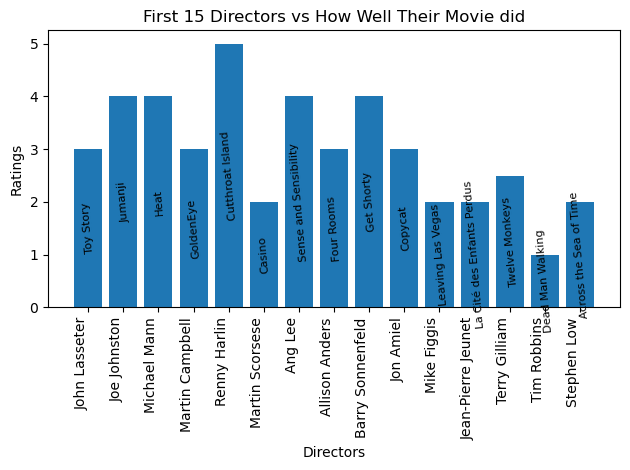

In [ ]:
first_15_directors=first_rating_df.head(15)


plt.bar(first_15_directors["Director"], first_15_directors["rating"])
#plt.figure(figsize=(20, 8))
plt.xlabel("Directors")
plt.ylabel("Ratings")
plt.title("First 15 Directors vs How Well Their Movie did")


# Add the exact movie name on each bar

for i, (rating, title) in enumerate(zip(first_15_directors['rating'], first_15_directors['original_title'])):
    plt.text(i, rating / 2, str(title), ha='center', va='center',\
            color='black',fontsize=8, rotation=95)

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Final read data into CSV format
first_rating_df.to_csv('first_rating_directors.csv', index=False)


In [ ]:
api_key= "&apikey=" + "XXXXXXX"
url="https://www.omdbapi.com/?t="

response=requests.get(url + first_rating_df.iloc[4,3] + api_key)
data=response.json()
pprint(data)



{'Actors': 'Geena Davis, Matthew Modine, Frank Langella',
 'Awards': '1 nomination total',
 'BoxOffice': '$10,017,322',
 'Country': 'France, Italy, Germany, United States',
 'DVD': 'N/A',
 'Director': 'Renny Harlin',
 'Genre': 'Action, Adventure, Comedy',
 'Language': 'English, Spanish, Latin, French',
 'Metascore': '37',
 'Plot': 'A female pirate and her companion race against their rivals to find '
         'a hidden island that contains a fabulous treasure.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BZTQ3OWY2NTctOTAyNS00MThjLTgyZjEtNzgzZGNiZDNhODUyXkEyXkFqcGc@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.7/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '40%'},
             {'Source': 'Metacritic', 'Value': '37/100'}],
 'Released': '22 Dec 1995',
 'Response': 'True',
 'Runtime': '124 min',
 'Title': 'Cutthroat Island',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Michael Frost Beckner,

In [ ]:
print(f'The Movie {data['Title']}, was released in {data["Released"]}, got {data['Awards']}  and had a Box Office total of: {data['BoxOffice']}')

The Movie Cutthroat Island, was released in 22 Dec 1995, got 1 nomination total  and had a Box Office total of: $10,017,322


<font size='5'>Question 3: What is the trend of movie runtimes over the years?</font>

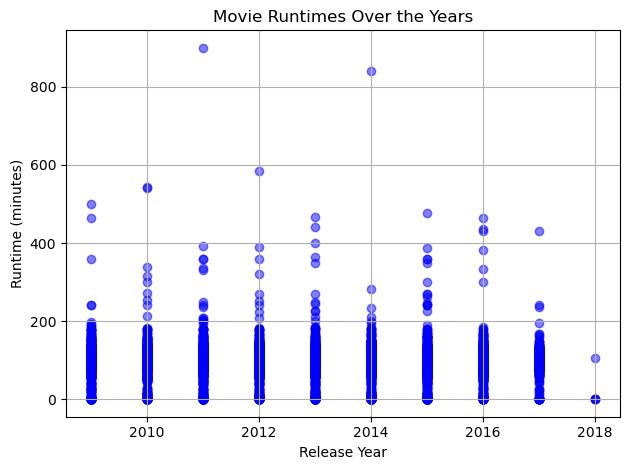

In [ ]:

#Question_3_your_name - What is the trend of movie runtimes over the years (e.g., are movies getting longer or shorter)?
trend_movies_df=last_decade_movies_df[["release_date","runtime"]]
trend_movies_df

# Set the figure size
#plt.figure(figsize=(12, 8))
plt.scatter(trend_movies_df["release_date"], trend_movies_df["runtime"], color="blue", alpha=0.5)
plt.title("Movie Runtimes Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Runtime (minutes)")
plt.tight_layout()

plt.grid()
plt.show()

<font size = '5'>Question 4 - Which Actors appear most frequently in high-rated movies (e.g., IMDb ratings > 7)</font>

In [ ]:
# Dropping unneeded columns for movie dataframe
clean_movies_df = movies_df.drop(columns=["adult", 
                                          "belongs_to_collection", 
                                          "budget", 
                                          "genres", 
                                          "homepage", 
                                          "original_language", 
                                          "overview",
                                          "popularity",
                                          "poster_path",
                                          "production_companies",
                                          "production_countries",
                                          "revenue", 
                                          "runtime", 
                                          "spoken_languages", 
                                          "status", 
                                          "tagline", 
                                          "video"])

# Dropping Cast Column
clean_credits_df = credits_df.drop(columns = ["crew"])


In [ ]:
pd.options.display.max_colwidth = 500 
clean_credits_df.head()

,cast,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f8...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2, 'id': 6837, 'name': 'Walter Matthau', 'order': 0, 'profile_path': '/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg'}, {'cast_id': 3, 'character': 'John Gustafson', 'credit_id': '52fe466a9251416c75077a91', 'gender': 2, 'id': 3151, 'name': 'Jack Lemmon', 'order': 1, 'profile_path': '/chZmNRYMtqkiDlatprGDH4BzGqG.jpg'}, {'cast_id': 4, 'character': 'Ariel Gustafson', 'credit_id': '52fe466a9251416c75077a95', 'gender...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad', 'gender': 1, 'id': 8851, 'name': 'Whitney Houston', 'order': 0, 'profile_path': '/69ouDnXnmklYPr4sMJXWKYz81AL.jpg'}, {'cast_id': 2, 'character': ""Bernadine 'Bernie' Harris"", 'credit_id': '52fe44779251416c91011ab1', 'gender': 1, 'id': 9780, 'name': 'Angela Bassett', 'order': 1, 'profile_path': '/tHkgSzhEuJKp5hqp0DZLad8HNZ9.jpg'}, {'cast_id': 3, 'character': ""Gloria 'Glo' Matthews"", 'credit_id': ...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': 2, 'id': 67773, 'name': 'Steve Martin', 'order': 0, 'profile_path': '/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg'}, {'cast_id': 2, 'character': 'Nina Banks', 'credit_id': '52fe44959251416c75039ebd', 'gender': 1, 'id': 3092, 'name': 'Diane Keaton', 'order': 1, 'profile_path': '/fzgUMnbOkxC6E3EFcYHWHFaiKyp.jpg'}, {'cast_id': 3, 'character': 'Franck Eggelhoffer', 'credit_id': '52fe44959251416c75039ec1', 'gender...",11862


In [ ]:
# Converting 'cast' column from strings to Python objects
clean_credits_df['cast'] = clean_credits_df['cast'].apply(ast.literal_eval)

In [ ]:
# Extract actor names
actor_names_df = clean_credits_df['cast'].apply(lambda x: [person['name'] for person in x])

# Setting the max number of actors per movie to 5
max_actors = 5

# Filling in list with "None" to make sure all rows have the same number of actors
actor_names_df = actor_names_df.apply(lambda x: x[:max_actors] + [None] * (max_actors - len(x)))

# Inserting actors in their own column
actor_columns = pd.DataFrame(actor_names_df.tolist(), 
                             columns=[f'actor_{i+1}' for i in range(max_actors)])

# Aligning indexes
actor_columns.index = clean_credits_df.index

# Merging the new actor columns with the original DataFrame
actor_results_df = pd.concat([clean_credits_df, actor_columns], axis=1)

# Removing old cast column
actor_results_df = actor_results_df.drop(columns=['cast'])

# Print the result
actor_results_df.head()


,id,actor_1,actor_2,actor_3,actor_4,actor_5
0,862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn
1,8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt
2,15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah
3,31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines
4,11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern


In [ ]:
# Cleaning up invalid entries
clean_movies_df['id'] = pd.to_numeric(clean_movies_df['id'], errors='coerce')
actor_results_df['id'] = pd.to_numeric(actor_results_df['id'], errors='coerce')
clean_movies_df = clean_movies_df.dropna(subset=['id'])
actor_results_df = actor_results_df.dropna(subset=['id'])

# Setting id column to int
clean_movies_df['id'] = clean_movies_df['id'].astype(int)
actor_results_df['id'] = actor_results_df['id'].astype(int)

# Merge
merged_movie_df = pd.merge(clean_movies_df, actor_results_df, how='left', on='id')
merged_movie_df.head()

,id,imdb_id,original_title,release_date,title,vote_average,vote_count,actor_1,actor_2,actor_3,actor_4,actor_5
0,862,tt0114709,Toy Story,1995-10-30,Toy Story,7.7,5415.0,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn
1,8844,tt0113497,Jumanji,1995-12-15,Jumanji,6.9,2413.0,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt
2,15602,tt0113228,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,92.0,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah
3,31357,tt0114885,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,34.0,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines
4,11862,tt0113041,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,5.7,173.0,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern


In [ ]:
# Putting the 5 actors into their own column with a repeating ID
merged_movie_df = merged_movie_df.melt(
    id_vars=['id', 'imdb_id', 'original_title', 'release_date', 'title', 'vote_average', 'vote_count'], 
    value_vars=['actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5'],  
    value_name='actor'  
)

# Applying Vote Average Filter
filtered_merged_movie_df = merged_movie_df[merged_movie_df['vote_average'] > 7]
actor_appearance_counts = filtered_merged_movie_df['actor'].value_counts()

# Display the top 20 actors 
actor_appearance_counts_df = actor_appearance_counts.reset_index()
actor_appearance_counts_df.columns = ['actor', 'appearance_count']
actor_appearance_counts_df.rename(columns={'actor': 'Actor', 'appearance_count': '# of Appearances'}, inplace=True)
actor_appearance_counts_df.head(20)

,Actor,# of Appearances
0,Robert De Niro,26
1,Bette Davis,26
2,Toshirō Mifune,23
3,Tom Hanks,21
4,Christopher Plummer,20
5,James Stewart,20
6,Werner Herzog,20
7,Humphrey Bogart,19
8,Clint Eastwood,19
9,Catherine Deneuve,19


In [ ]:
# Double checking our results
filtered_actor = merged_movie_df[
    (merged_movie_df['actor'] == 'Robert De Niro') & (merged_movie_df['vote_average'] > 7)
     ]
filtered_actor.sort_values(by='vote_average', ascending=False)

,id,imdb_id,original_title,release_date,title,vote_average,vote_count,variable,actor
20567,103162,tt0175844,Lenny Bruce: Swear to Tell the Truth,1998-10-21,Lenny Bruce: Swear to Tell the Truth,9.5,1.0,actor_1,Robert De Niro
137798,240,tt0071562,The Godfather: Part II,1974-12-20,The Godfather: Part II,8.3,3418.0,actor_4,Robert De Niro
1187,311,tt0087843,Once Upon a Time in America,1984-02-16,Once Upon a Time in America,8.3,1104.0,actor_1,Robert De Niro
1173,769,tt0099685,GoodFellas,1990-09-12,GoodFellas,8.2,3211.0,actor_1,Robert De Niro
109,103,tt0075314,Taxi Driver,1976-02-07,Taxi Driver,8.1,2632.0,actor_1,Robert De Niro
1221,11778,tt0077416,The Deer Hunter,1978-12-08,The Deer Hunter,7.8,943.0,actor_1,Robert De Niro
15,524,tt0112641,Casino,1995-11-22,Casino,7.8,1343.0,actor_1,Robert De Niro
1188,1578,tt0081398,Raging Bull,1980-11-14,Raging Bull,7.7,968.0,actor_1,Robert De Niro
45544,949,tt0113277,Heat,1995-12-15,Heat,7.7,1886.0,actor_2,Robert De Niro
46699,68,tt0088846,Brazil,1985-02-20,Brazil,7.6,877.0,actor_2,Robert De Niro


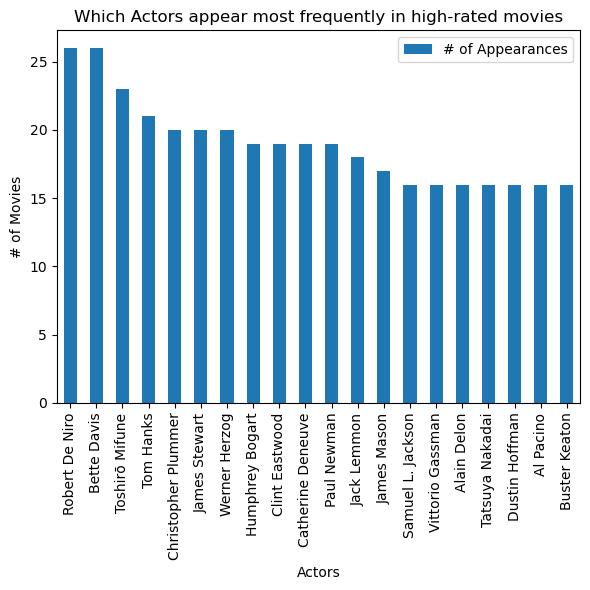

In [ ]:
# Visualization of Most appearances in movies with a score of 7+ IMDB
actor_appearance_counts_df.head(20).plot.bar(x='Actor', y='# of Appearances', figsize=(6,6), width=0.5)
plt.title('Which Actors appear most frequently in high-rated movies')
plt.xlabel('Actors')
plt.ylabel('# of Movies')
plt.tight_layout()
plt.show()

In [ ]:
# Implementing IMDb ID from Dataframe into OMDb API call for Paranormal Activity
imdb_id = filtered_actor.loc[filtered_actor['title'] == 'The Godfather: Part II', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [ ]:
# Print information about a movie from Robert De Niro

movie_actors = data['Actors'].split(", ")
target_movie_actor = movie_actors[1]
movie_title = data['Title']
movie_actor = data['Actors'][1]
movie_boxoffice = data['BoxOffice']
imdb_rating = filtered_actor.loc[filtered_actor['title'] == 'The Godfather: Part II', 'vote_average'].values[0]
release_date = data['Released']

print(f'{target_movie_actor} starred in the movie, {movie_title}. It was released in {release_date} and it grossed a box office of {movie_boxoffice} with an IMDb rating of {imdb_rating}.')


Robert De Niro starred in the movie, The Godfather Part II. It was released in 18 Dec 1974 and it grossed a box office of $47,834,595 with an IMDb rating of 8.3.


<font size = '5'>Question 5 - How does budget correlate with IMDb rating? Does more budget mean a better rating?</font>


In [ ]:
# Dropping unneeded columns for movie dataframe
q5_clean_movies_df = movies_df.drop(columns = ["adult", 
                                          "belongs_to_collection", 
                                          "genres", 
                                          "homepage", 
                                          "original_language",
                                          "original_title", 
                                          "overview",
                                          "popularity",
                                          "poster_path",
                                          "production_companies",
                                          "production_countries",
                                          "release_date",
                                          "revenue", 
                                          "runtime", 
                                          "spoken_languages", 
                                          "status", 
                                          "tagline", 
                                          "video"])



In [ ]:
# Filtering with movies with 1000+ votes
q5_filtered_movies_df = q5_clean_movies_df.loc[q5_clean_movies_df['vote_count'] > 1000]

# Changing Data type and formatting for budget
change_types = {'budget': int}
q5_filtered_movies_df = q5_filtered_movies_df.astype(change_types)
q5_filtered_movies_df['budget'] = pd.to_numeric(q5_filtered_movies_df['budget'], errors='coerce')
q5_filtered_movies_df

,budget,id,imdb_id,title,vote_average,vote_count
0,30000000,862,tt0114709,Toy Story,7.7,5415.0
1,65000000,8844,tt0113497,Jumanji,6.9,2413.0
5,60000000,949,tt0113277,Heat,7.7,1886.0
9,58000000,710,tt0113189,GoldenEye,6.6,1194.0
15,52000000,524,tt0112641,Casino,7.8,1343.0
...,...,...,...,...,...,...
43644,34000000,339403,tt3890160,Baby Driver,7.2,2083.0
44009,80000000,324852,tt3469046,Despicable Me 3,6.2,2002.0
44274,152000000,281338,tt3450958,War for the Planet of the Apes,6.7,1675.0
44678,100000000,374720,tt5013056,Dunkirk,7.5,2712.0


In [ ]:
# Sorting budget column
q5_filtered_movies_df = q5_filtered_movies_df.sort_values(by='budget', ascending=False)

# Taking the top 100 movies with the most budget
q5_movies_top100_df = q5_filtered_movies_df.head(100)
pd.set_option('display.max_rows', 100)

In [ ]:
# Sorting budget column
q5_filtered_movies_df = q5_filtered_movies_df.sort_values(by='budget', ascending=True)

# Filtering with movies with 0 budget
q5_filtered_movies_df = q5_filtered_movies_df.loc[q5_filtered_movies_df['budget'] > 0]

# Taking the top 100 movies with the most budget
q5_movies_bottom100_df = q5_filtered_movies_df.head(100)
pd.set_option('display.max_rows', 100)


In [ ]:
# Counting number of 7+, 6.99 - 5, and 4.99 - 0 for Top 100 movies with most budget

# 7+
topscores_7plus_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] >= 7)]
topscores_7plus_count = len(topscores_7plus_df)
print(topscores_7plus_count)



34


In [ ]:
# 6.99 - 5
topscores_6thru5_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] >= 5) & (q5_movies_top100_df['vote_average'] <= 6.99)]
topscores_6thru5_count = len(topscores_6thru5_df)
print(topscores_6thru5_count)


65


In [ ]:
# 4.99 - 0
topscores_4andless_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] <= 4.99)]
topscores_4andless_count = len(topscores_4andless_df)
print(topscores_4andless_count)

1


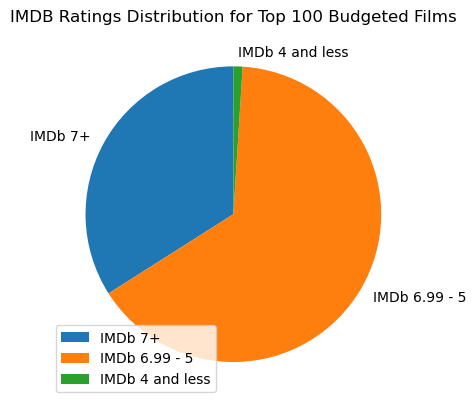

In [ ]:
# Pie Chart to showcase how movies appear based on rating

y = np.array([topscores_7plus_count, topscores_6thru5_count, topscores_4andless_count])
labels = ['IMDb 7+', 'IMDb 6.99 - 5', 'IMDb 4 and less']

plt.pie(y, labels=labels, startangle=90)
plt.title('IMDB Ratings Distribution for Top 100 Budgeted Films')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Implementing IMDb ID from Dataframe into OMDb API call
imdb_id = topscores_4andless_df.loc[topscores_4andless_df['title'] == 'Independence Day: Resurgence', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'Actors': 'Liam Hemsworth, Jeff Goldblum, Bill Pullman',
 'Awards': '3 wins & 17 nominations total',
 'BoxOffice': '$103,144,286',
 'Country': 'United States, India',
 'DVD': 'N/A',
 'Director': 'Roland Emmerich',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Language': 'English, Mandarin, Russian',
 'Metascore': '32',
 'Plot': 'Two decades after the first Independence Day invasion, Earth is '
         "faced with a new extra-Solar threat. But will mankind's new space "
         'defenses be enough?',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjIyMTg5MTg4OV5BMl5BanBnXkFtZTgwMzkzMjY5NzE@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.2/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '29%'},
             {'Source': 'Metacritic', 'Value': '32/100'}],
 'Released': '24 Jun 2016',
 'Response': 'True',
 'Runtime': '120 min',
 'Title': 'Independence Day: Resurgence',
 'Type': 'movie',
 'Website': 'N/A',
 '

In [ ]:
# Print information about worst rated movie with the most budget

movie_title = data['Title']
movie_budget = topscores_4andless_df['budget'].iloc[0]
movie_boxoffice = data['BoxOffice']
imdb_rating = topscores_4andless_df['vote_average'].iloc[0]
movie_plot = data['Plot']

print(f'The movie {movie_title} had a budget of ${movie_budget:,}. Their Box Office was {movie_boxoffice} with an IMDb rating of {imdb_rating}.')
print('')
print(f'Plot: {movie_plot}')

The movie Independence Day: Resurgence had a budget of $165,000,000. Their Box Office was $103,144,286 with an IMDb rating of 4.9.

Plot: Two decades after the first Independence Day invasion, Earth is faced with a new extra-Solar threat. But will mankind's new space defenses be enough?


In [ ]:
# Counting number of 7+, 6.99 - 5, and 4.99 - 0 for Top 100 movies with the least budget

# 7+
bottomscores_7plus_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] >= 7)]
bottomscores_7plus_count = len(bottomscores_7plus_df)
print(bottomscores_7plus_count )

67


In [ ]:
# 6.99 - 5
bottomscores_6thru5_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] >= 5) & (q5_movies_bottom100_df['vote_average'] <= 6.99)]
bottomscores_6thru5_count = len(bottomscores_6thru5_df)
print(bottomscores_6thru5_count)

31


In [ ]:
# 4.99 - 0
bottomscores_4andless_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] <= 4.99)]
bottomscores_4andless_count = len(bottomscores_4andless_df)
print(bottomscores_4andless_count)

2


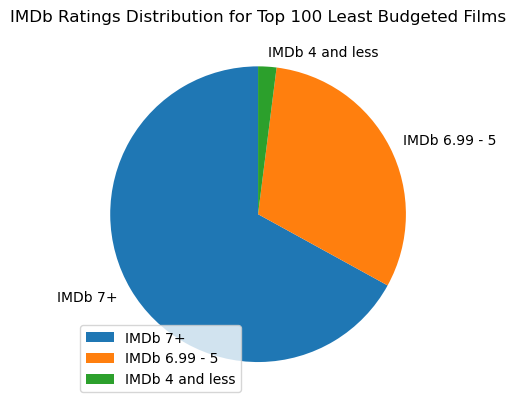

In [ ]:
# Pie Chart to showcase how movies appear based on rating (Least Budget)

y = np.array([bottomscores_7plus_count, bottomscores_6thru5_count, bottomscores_4andless_count])
labels = ['IMDb 7+', 'IMDb 6.99 - 5', 'IMDb 4 and less']

plt.pie(y, labels=labels, startangle=90)
plt.title('IMDb Ratings Distribution for Top 100 Least Budgeted Films')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# bottomscores_7plus_df = bottomscores_7plus_df.sort_values(by='vote_average', ascending=False)
bottomscores_7plus_df = bottomscores_7plus_df.sort_values(by='budget', ascending=True)
bottomscores_7plus_df.head(5)

,budget,id,imdb_id,title,vote_average,vote_count
1873,300000,948,tt0077651,Halloween,7.4,1066.0
1161,350000,389,tt0050083,12 Angry Men,8.2,2130.0
1100,400000,762,tt0071853,Monty Python and the Holy Grail,7.8,1742.0
1176,806948,539,tt0054215,Psycho,8.3,2405.0
896,839727,15,tt0033467,Citizen Kane,8.0,1244.0


In [ ]:
# Implementing IMDb ID from Dataframe into OMDb API call for Paranormal Activity
imdb_id = bottomscores_6thru5_df.loc[bottomscores_6thru5_df['title'] == 'Paranormal Activity', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [ ]:
# Print information about a movie with the least budget

movie_title = data['Title']
movie_budget = bottomscores_6thru5_df['budget'].iloc[0]
movie_boxoffice = data['BoxOffice']
imdb_rating = bottomscores_6thru5_df['vote_average'].iloc[0]
movie_plot = data['Plot']

print(f'The movie {movie_title} had a budget of ${movie_budget:,}. Their Box Office was {movie_boxoffice} with an IMDb rating of {imdb_rating}.')
print('')
print(f'Plot: {movie_plot}')

The movie Paranormal Activity had a budget of $15,000. Their Box Office was $107,918,810 with an IMDb rating of 5.9.

Plot: After moving into a suburban home, a couple becomes increasingly disturbed by a nightly demonic presence.


<font size='5'>Question 6 - Which countries produce the most amount of movies in each genre?</font>

In [ ]:
# Drop columns with unneeded data.

clean_movies_metadata_df = movies_metadata_df.drop(columns=["adult", "poster_path", "production_companies", "belongs_to_collection", 
                                                            "homepage", "original_language", "original_title", "overview", "release_date", 
                                                            "runtime", "spoken_languages", "status", "tagline","video"])

clean_movies_metadata_df



,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,Subdue,4.0,1.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,Century of Birthing,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
45464,0,[],227506,tt0008536,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,Satan Triumphant,0.0,0.0


In [ ]:
print(clean_movies_metadata_df.isnull().values.any())



True


In [ ]:
#clean_movies_metadata_df.dropna(axis=0, how="any", inplace=True)

#drop rows with missing values

clean_movies_metadata_df=clean_movies_metadata_df.dropna()
clean_movies_metadata_df=clean_movies_metadata_df.dropna(axis=1,)

clean_movies_metadata_df

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,Subdue,4.0,1.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,Century of Birthing,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
45464,0,[],227506,tt0008536,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,Satan Triumphant,0.0,0.0


In [ ]:
clean_movies_metadata_df.info()

In [ ]:

#Ensure to convert any string in the genres column is converted into a Python Object - List or Dictionary. 

clean_movies_metadata_df["genres"]=clean_movies_metadata_df["genres"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x) 

# Extract the value of the "name" key. If ots not a list, assign an empty list instead. 

clean_movies_metadata_df["genres"]=clean_movies_metadata_df["genres"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

#clean_movies_metadata_df = clean_movies_metadata_df.explode("genres")

clean_movies_metadata_df.head()

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
2,0,"[Romance, Comedy]",15602,tt0113228,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Grumpier Old Men,6.5,92.0
3,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,Waiting to Exhale,6.1,34.0
4,0,[Comedy],11862,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,Father of the Bride Part II,5.7,173.0


In [ ]:
exploded_df = clean_movies_metadata_df.explode("genres", ignore_index=True)

exploded_df

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,Animation,862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...
93487,0,Action,67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
93488,0,Drama,67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
93489,0,Thriller,67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
93490,0,NaN,227506,tt0008536,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,Satan Triumphant,0.0,0.0


In [ ]:
#Ensure to convert any string in the genres column is convert into a Python Object - List or Dictionary.

exploded_df["production_countries"] = exploded_df["production_countries"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)

# Extract the value of the "name" key. If ots not a list, assign an empty list instead.

exploded_df["production_countries"] = exploded_df["production_countries"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

exploded_df


,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,Animation,862,tt0114709,21.946943,[United States of America],373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,[United States of America],373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,[United States of America],373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,[United States of America],262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,[United States of America],262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...
93487,0,Action,67758,tt0303758,0.903007,[United States of America],0.0,Betrayal,3.8,6.0
93488,0,Drama,67758,tt0303758,0.903007,[United States of America],0.0,Betrayal,3.8,6.0
93489,0,Thriller,67758,tt0303758,0.903007,[United States of America],0.0,Betrayal,3.8,6.0
93490,0,NaN,227506,tt0008536,0.003503,[Russia],0.0,Satan Triumphant,0.0,0.0


In [ ]:
exploded_final_df = exploded_df.explode("production_countries")

exploded_final_df.head(25)

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
5,65000000,Family,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
6,0,Romance,15602,tt0113228,11.7129,United States of America,0.0,Grumpier Old Men,6.5,92.0
7,0,Comedy,15602,tt0113228,11.7129,United States of America,0.0,Grumpier Old Men,6.5,92.0
8,16000000,Comedy,31357,tt0114885,3.859495,United States of America,81452156.0,Waiting to Exhale,6.1,34.0
9,16000000,Drama,31357,tt0114885,3.859495,United States of America,81452156.0,Waiting to Exhale,6.1,34.0


In [ ]:
cleaned_metadata_df = exploded_final_df.rename(columns={"budget":"Budget", "genres":"Genres", "id":"ID", "imdb_id":"IMDB ID", "popularity":"Popularity", "production_countries": "Production Country", "revenue": "Revenue", "title": "Movie Title", "vote_average": "Average Rating", "vote_count": "Vote County"})

cleaned_metadata_df

,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...
93487,0,Action,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
93488,0,Drama,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
93489,0,Thriller,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
93490,0,NaN,227506,tt0008536,0.003503,Russia,0.0,Satan Triumphant,0.0,0.0


In [ ]:
# Question 6 - Which countries produce the highest number of movies in specific genres (e.g., Action, Drama)?

country_genre_movie_count_df = cleaned_metadata_df.groupby(["Production Country", "Genres"]).size().reset_index(name= "Movie Count")

country_genre_movie_count_df = country_genre_movie_count_df.sort_values(by= "Movie Count", ascending=False)

country_genre_movie_count_df


,Production Country,Genres,Movie Count
1549,United States of America,Drama,9042
1546,United States of America,Comedy,6836
1560,United States of America,Thriller,4368
1543,United States of America,Action,3699
1557,United States of America,Romance,3576
...,...,...,...
907,Malta,Fantasy,1
908,Malta,History,1
909,Malta,Horror,1
910,Malta,Mystery,1


In [ ]:
country_genre_movie_count_df["Production Country"].nunique()

157

In [ ]:
#Country with the most action movies 

most_action_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Action"]

most_action_movies_df.head(10)



,Production Country,Genres,Movie Count
1543,United States of America,Action,3699
1521,United Kingdom,Action,563
745,Japan,Action,511
578,Hong Kong,Action,421
486,France,Action,309
229,Canada,Action,289
718,Italy,Action,272
524,Germany,Action,249
630,India,Action,219
272,China,Action,152


In [ ]:
#Country with the most comedy movies

most_comedy_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Comedy"]

most_comedy_movies_df.head(10)

,Production Country,Genres,Movie Count
1546,United States of America,Comedy,6836
489,France,Comedy,1186
1524,United Kingdom,Comedy,1011
721,Italy,Comedy,657
527,Germany,Comedy,562
232,Canada,Comedy,383
1197,Russia,Comedy,300
748,Japan,Comedy,264
633,India,Comedy,249
1354,Spain,Comedy,246


In [ ]:
#Country with the most drama movies

most_drama_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Drama"]

most_drama_movies_df.head(10)

,Production Country,Genres,Movie Count
1549,United States of America,Drama,9042
492,France,Drama,2409
1527,United Kingdom,Drama,2142
530,Germany,Drama,1305
724,Italy,Drama,991
751,Japan,Drama,817
235,Canada,Drama,773
636,India,Drama,493
1357,Spain,Drama,469
1200,Russia,Drama,454


In [ ]:
#Country with the most romantic movies

most_romance_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"]== "Romance"]

most_romance_movies_df.head(10)

,Production Country,Genres,Movie Count
1557,United States of America,Romance,3576
500,France,Romance,713
1535,United Kingdom,Romance,656
538,Germany,Romance,288
644,India,Romance,264
732,Italy,Romance,263
243,Canada,Romance,202
759,Japan,Romance,175
1208,Russia,Romance,162
1365,Spain,Romance,133


In [ ]:
#Country with the most animation movies

most_animation_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Animation"]

most_animation_movies_df.head(10)

,Production Country,Genres,Movie Count
1545,United States of America,Animation,896
747,Japan,Animation,408
488,France,Animation,120
1523,United Kingdom,Animation,96
231,Canada,Animation,80
1196,Russia,Animation,80
526,Germany,Animation,72
123,Belgium,Animation,35
362,Czech Republic,Animation,25
1353,Spain,Animation,24


In [ ]:
#Create a new CSV file from the cleaned data to answer questions 7 and 8.as_integer_ratio

cleaned_metadata_df.to_csv("Resources/cleaned_movie_data.csv", index=True)

In [ ]:

#Create a visualization to illustrate your findings

import matplotlib.pyplot as plt



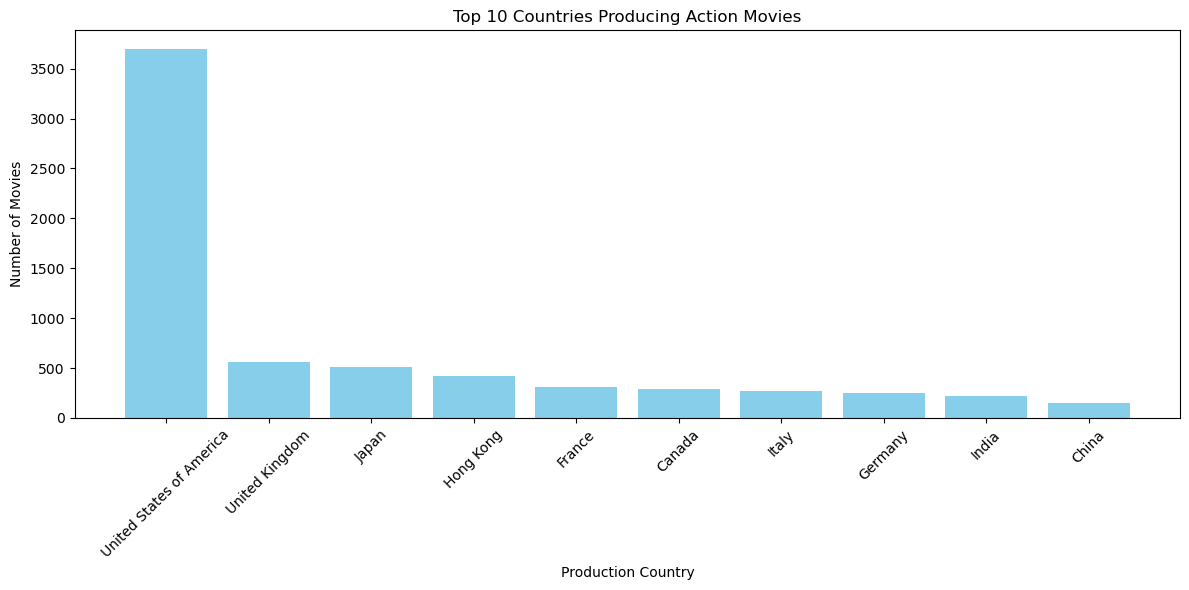

In [ ]:
# Bar Chart for Action movies.
specific_genre = "Action"
action_bar_df = most_action_movies_df[most_action_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(action_bar_df["Production Country"], action_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

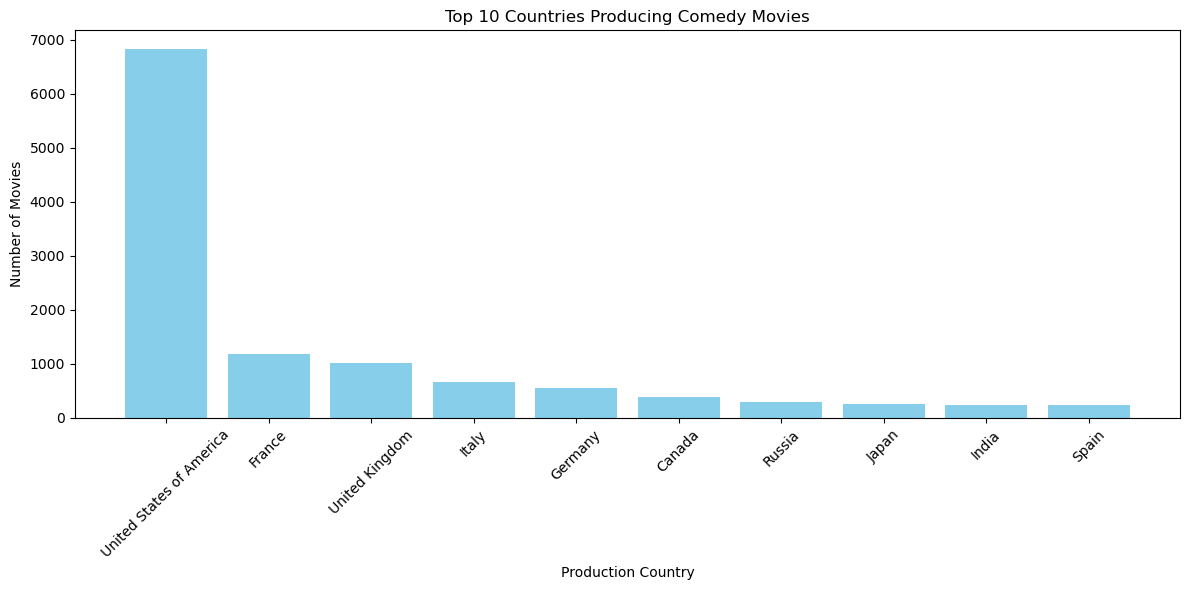

In [ ]:
# Bar Chart for Comedy movies.  
specific_genre = "Comedy"
comedy_bar_df = most_comedy_movies_df[most_comedy_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(comedy_bar_df["Production Country"], comedy_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

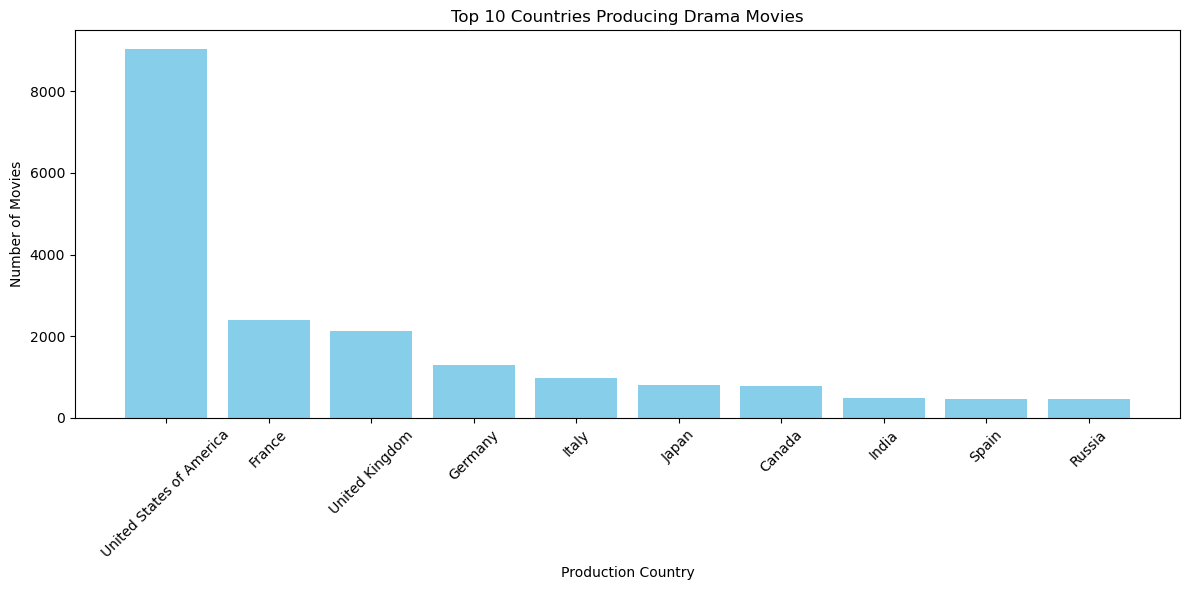

In [ ]:
# Bar Chart for Drama movies.  
specific_genre = "Drama"
drama_bar_df = most_drama_movies_df[most_drama_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(drama_bar_df["Production Country"], drama_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

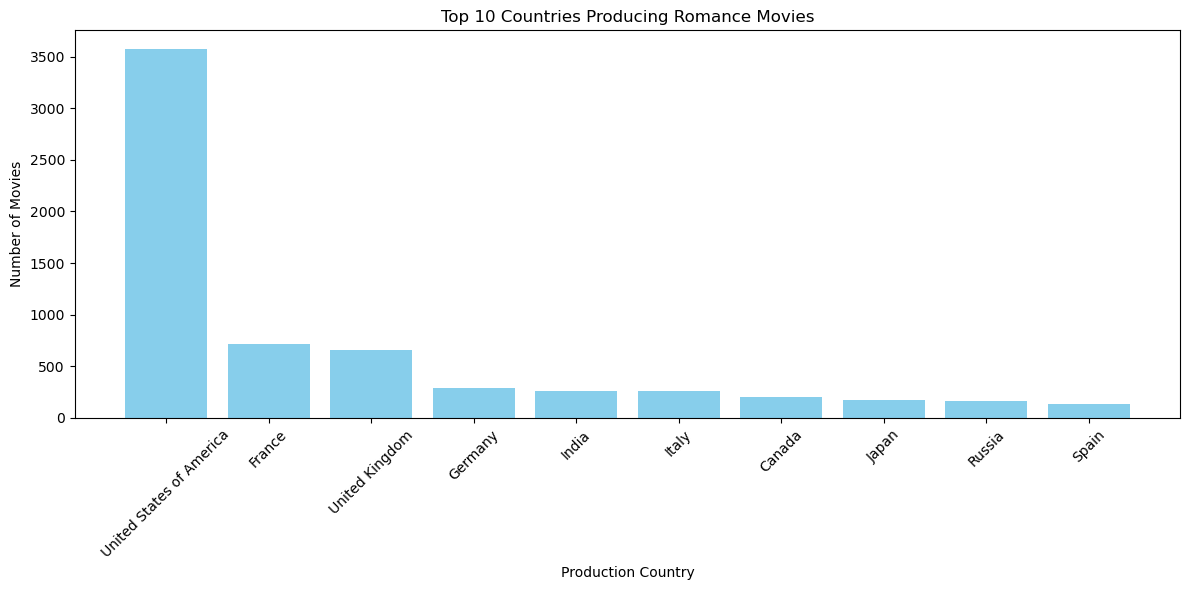

In [ ]:
# Bar Chart for Romantic movies.  
specific_genre = "Romance"
romance_bar_df = most_romance_movies_df[most_romance_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(romance_bar_df["Production Country"], romance_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

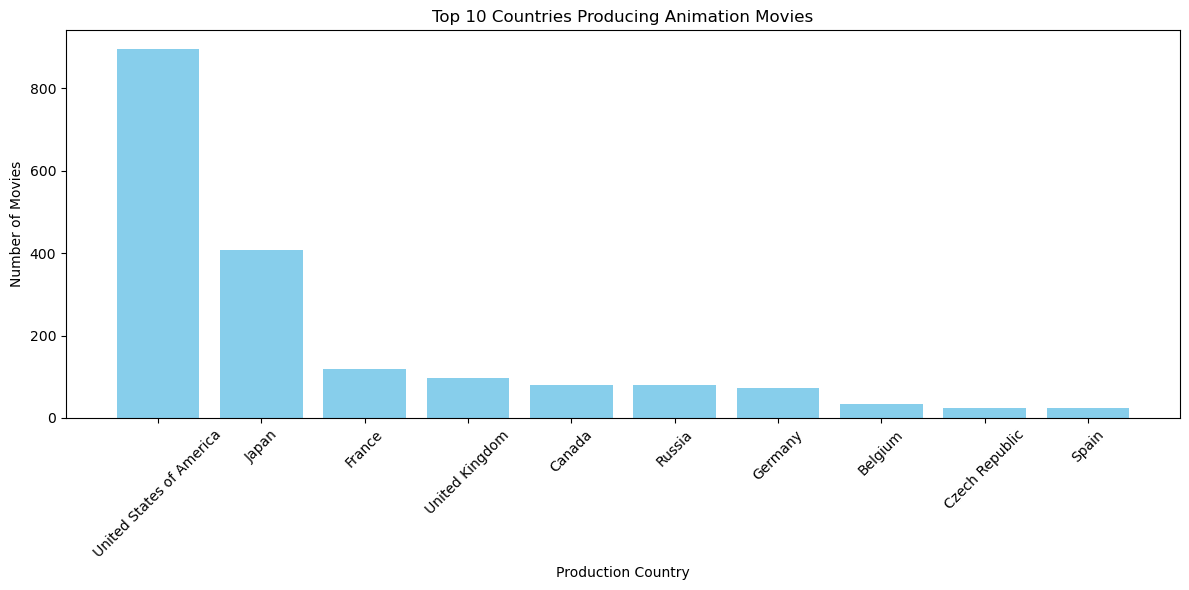

In [ ]:
# Bar Chart for Animation movies.  
specific_genre = "Animation"
animation_bar_df = most_animation_movies_df[most_animation_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(animation_bar_df["Production Country"], animation_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

<font size='5'>Question 7 - On average, which movie genre generates the most revenue?</font>

In [ ]:
cleaned_metadata_df = pd.read_csv("Resources/cleaned_movie_data.csv")

cleaned_metadata_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
0,0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116432,93487,0,Action,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116433,93488,0,Drama,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116434,93489,0,Thriller,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116435,93490,0,NaN,227506,tt0008536,0.003503,Russia,0.0,Satan Triumphant,0.0,0.0


In [ ]:
cleaned_metadata_df = cleaned_metadata_df[(cleaned_metadata_df !=0).all(axis=1)]

cleaned_metadata_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
5,5,65000000,Family,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116311,93383,2000000,Drama,63281,tt1718881,0.121844,Russia,1268793.0,Pro Lyuboff,4.0,3.0
116330,93400,5000000,Action,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116331,93401,5000000,Comedy,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116332,93402,5000000,Crime,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0


In [ ]:
# Original Question 7 -  What is the average IMDb rating of movies with a specific keyword in their plot (e.g., "alien")?

# New Question 7 - Which genres generate the highest average revenue?

revenue_by_genre_df = cleaned_metadata_df.groupby("Genres")["Revenue"].mean().reset_index()

revenue_by_genre_df = revenue_by_genre_df.rename(columns={"Revenue": "Average Revenue by Genre"})

In [ ]:

revenue_by_genre_df = revenue_by_genre_df.sort_values(by="Average Revenue by Genre", ascending=False).reset_index()

revenue_by_genre_df 

,index,Genres,Average Revenue by Genre
0,1,Adventure,2.024051e+08
1,8,Fantasy,1.979628e+08
2,2,Animation,1.941754e+08
3,7,Family,1.914142e+08
4,15,Science Fiction,1.488569e+08
5,0,Action,1.444742e+08
6,17,Thriller,8.991798e+07
7,13,Mystery,8.257412e+07
8,3,Comedy,8.133823e+07
9,18,War,8.062990e+07


In [ ]:
del revenue_by_genre_df["index"]

revenue_by_genre_df

,Genres,Average Revenue by Genre
0,Adventure,2.024051e+08
1,Fantasy,1.979628e+08
2,Animation,1.941754e+08
3,Family,1.914142e+08
4,Science Fiction,1.488569e+08
5,Action,1.444742e+08
6,Thriller,8.991798e+07
7,Mystery,8.257412e+07
8,Comedy,8.133823e+07
9,War,8.062990e+07


In [ ]:
revenue_by_genre_df["Average Revenue by Genre"] = round(revenue_by_genre_df["Average Revenue by Genre"], 1)

revenue_by_genre_df

,Genres,Average Revenue by Genre
0,Adventure,202405064.6
1,Fantasy,197962826.4
2,Animation,194175414.1
3,Family,191414211.8
4,Science Fiction,148856896.9
5,Action,144474234.8
6,Thriller,89917976.7
7,Mystery,82574121.2
8,Comedy,81338226.9
9,War,80629896.7


In [ ]:
import matplotlib.pyplot as plt

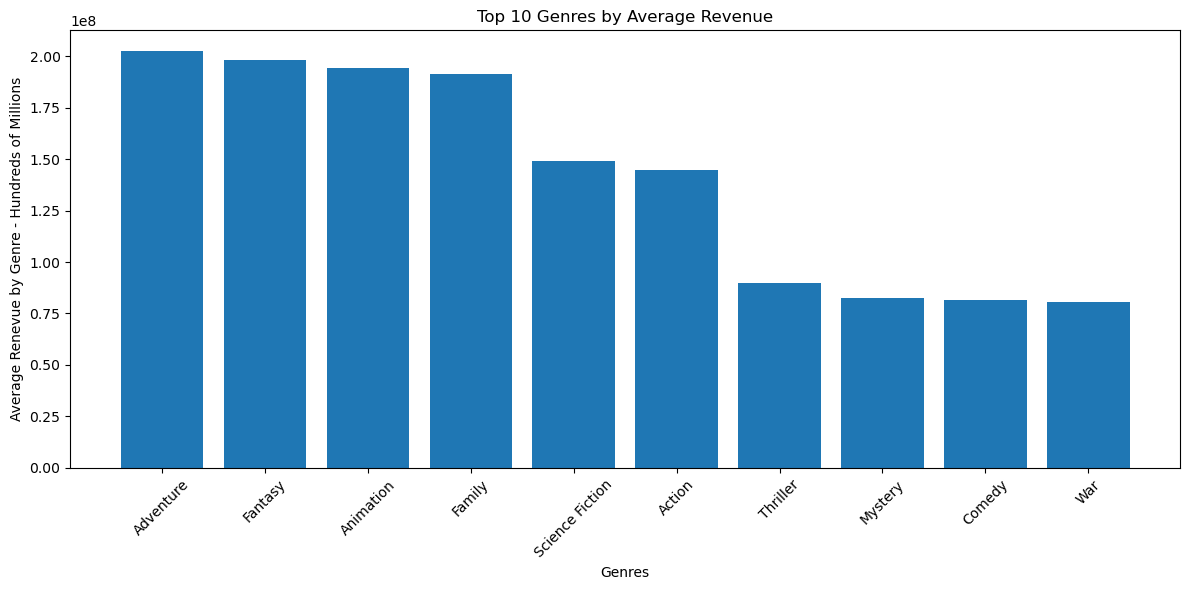

In [ ]:
# Create a bar chart to visualize the average revenue generated by each genre.

avg_revenues_by_genre_df = revenue_by_genre_df.head(10)

plt.figure(figsize = (12,6))
plt.bar(avg_revenues_by_genre_df["Genres"], (avg_revenues_by_genre_df["Average Revenue by Genre"]))
plt.xlabel("Genres")
plt.ylabel("Average Renevue by Genre - Hundreds of Millions")
plt.title("Top 10 Genres by Average Revenue")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<font size='5'>Question 8 - Does a genre’s revenue correlate to its profitability?</font>

In [ ]:
cleaned_movie_data_df = pd.read_csv("Resources/cleaned_movie_data.csv")

cleaned_movie_data_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
0,0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116432,93487,0,Action,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116433,93488,0,Drama,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116434,93489,0,Thriller,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116435,93490,0,NaN,227506,tt0008536,0.003503,Russia,0.0,Satan Triumphant,0.0,0.0


In [ ]:
cleaned_movie_data_df = cleaned_movie_data_df[(cleaned_movie_data_df !=0).all(axis=1)]

cleaned_movie_data_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
5,5,65000000,Family,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116311,93383,2000000,Drama,63281,tt1718881,0.121844,Russia,1268793.0,Pro Lyuboff,4.0,3.0
116330,93400,5000000,Action,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116331,93401,5000000,Comedy,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116332,93402,5000000,Crime,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0


In [ ]:
budget_revenue_comp_df = cleaned_movie_data_df.groupby("Genres")[["Budget", "Revenue"]].mean().reset_index()

budget_revenue_comp_df

,Genres,Budget,Revenue
0,Action,5.340187e+07,1.444742e+08
1,Adventure,6.683163e+07,2.024051e+08
2,Animation,5.910320e+07,1.941754e+08
3,Comedy,2.861673e+07,8.133823e+07
4,Crime,2.964347e+07,7.062343e+07
5,Documentary,6.057482e+06,1.911885e+07
6,Drama,2.386656e+07,5.893994e+07
7,Family,5.911703e+07,1.914142e+08
8,Fantasy,6.342396e+07,1.979628e+08
9,Foreign,3.700846e+06,3.433224e+06


In [ ]:
# Original Question - What is the distribution of MPAA ratings (e.g., PG, PG-13, R) across different genres?

# Does revenue per genre correlate with profitability by genre?


profitability_by_genre_df = budget_revenue_comp_df["Revenue"] - budget_revenue_comp_df["Budget"]

profitability_by_genre_df

0     9.107237e+07
1     1.355734e+08
2     1.350722e+08
3     5.272149e+07
4     4.097997e+07
5     1.306137e+07
6     3.507338e+07
7     1.322972e+08
8     1.345389e+08
9    -2.676222e+05
10    2.973896e+07
11    3.681409e+07
12    4.269488e+07
13    5.021738e+07
14    4.306671e+07
15    9.461922e+07
16    3.700000e+07
17    5.429917e+07
18    4.391131e+07
19    3.219018e+07
dtype: float64

In [ ]:
profitability_by_genre_df = pd.DataFrame(profitability_by_genre_df)


profitability_by_genre_df

,0
0,9.107237e+07
1,1.355734e+08
2,1.350722e+08
3,5.272149e+07
4,4.097997e+07
5,1.306137e+07
6,3.507338e+07
7,1.322972e+08
8,1.345389e+08
9,-2.676222e+05


In [ ]:
renamed_profitability_df = profitability_by_genre_df.rename(columns={0: "Profit or Loss"})
renamed_profitability_df.head()

,Profit or Loss
0,9.107237e+07
1,1.355734e+08
2,1.350722e+08
3,5.272149e+07
4,4.097997e+07


In [ ]:
renamed_profitability_df["Profit or Loss"] = round(renamed_profitability_df["Profit or Loss"], 1)

renamed_profitability_df

,Profit or Loss
0,91072365.6
1,135573436.5
2,135072215.2
3,52721494.4
4,40979965.5
5,13061365.2
6,35073376.8
7,132297184.3
8,134538866.0
9,-267622.2


In [ ]:
final_profitability_by_genre_df = budget_revenue_comp_df.join(renamed_profitability_df, how='inner')

final_profitability_by_genre_df.head()

,Genres,Budget,Revenue,Profit or Loss
0,Action,5.340187e+07,1.444742e+08,91072365.6
1,Adventure,6.683163e+07,2.024051e+08,135573436.5
2,Animation,5.910320e+07,1.941754e+08,135072215.2
3,Comedy,2.861673e+07,8.133823e+07,52721494.4
4,Crime,2.964347e+07,7.062343e+07,40979965.5


In [ ]:
final_profitability_by_genre_df["Revenue"] = round(final_profitability_by_genre_df["Revenue"], 1)

final_profitability_by_genre_df

,Genres,Budget,Revenue,Profit or Loss
0,Action,5.340187e+07,144474234.8,91072365.6
1,Adventure,6.683163e+07,202405064.7,135573436.5
2,Animation,5.910320e+07,194175414.1,135072215.2
3,Comedy,2.861673e+07,81338226.9,52721494.4
4,Crime,2.964347e+07,70623434.4,40979965.5
5,Documentary,6.057482e+06,19118847.5,13061365.2
6,Drama,2.386656e+07,58939935.9,35073376.8
7,Family,5.911703e+07,191414211.8,132297184.3
8,Fantasy,6.342396e+07,197962826.4,134538866.0
9,Foreign,3.700846e+06,3433223.9,-267622.2


In [ ]:
final_profitability_by_genre_df["Budget"] = round(final_profitability_by_genre_df["Budget"], 1)

final_profitability_by_genre_df

,Genres,Budget,Revenue,Profit or Loss
0,Action,53401869.2,144474234.8,91072365.6
1,Adventure,66831628.2,202405064.7,135573436.5
2,Animation,59103198.8,194175414.1,135072215.2
3,Comedy,28616732.5,81338226.9,52721494.4
4,Crime,29643469.0,70623434.4,40979965.5
5,Documentary,6057482.2,19118847.5,13061365.2
6,Drama,23866559.1,58939935.9,35073376.8
7,Family,59117027.5,191414211.8,132297184.3
8,Fantasy,63423960.4,197962826.4,134538866.0
9,Foreign,3700846.0,3433223.9,-267622.2


In [ ]:
profit_percentage_df = final_profitability_by_genre_df["Profit or Loss"] / final_profitability_by_genre_df["Budget"] * 100

profit_percentage_df

0     170.541532
1     202.858198
2     228.536218
3     184.233103
4     138.242813
5     215.623666
6     146.956152
7     223.788627
8     212.126246
9      -7.231379
10     90.247065
11    187.139598
12    207.930915
13    155.199162
14    195.226057
15    174.452936
16    740.000000
17    152.445202
18    119.588767
19    108.122823
dtype: float64

In [ ]:
profit_percentage_df = pd.DataFrame(profit_percentage_df)

profit_percentage_df

,0
0,170.541532
1,202.858198
2,228.536218
3,184.233103
4,138.242813
5,215.623666
6,146.956152
7,223.788627
8,212.126246
9,-7.231379


In [ ]:
profit_percentage_df = profit_percentage_df.rename(columns={0: "Profit / Loss %"})

profit_percentage_df


,Profit / Loss %
0,170.541532
1,202.858198
2,228.536218
3,184.233103
4,138.242813
5,215.623666
6,146.956152
7,223.788627
8,212.126246
9,-7.231379


In [ ]:
# Create a bar chart to visualize the 

final_profitability_by_genre_df = final_profitability_by_genre_df.join(profit_percentage_df, how="inner")

final_profitability_by_genre_df

,Genres,Budget,Revenue,Profit or Loss,Profit / Loss %
0,Action,53401869.2,144474234.8,91072365.6,170.541532
1,Adventure,66831628.2,202405064.7,135573436.5,202.858198
2,Animation,59103198.8,194175414.1,135072215.2,228.536218
3,Comedy,28616732.5,81338226.9,52721494.4,184.233103
4,Crime,29643469.0,70623434.4,40979965.5,138.242813
5,Documentary,6057482.2,19118847.5,13061365.2,215.623666
6,Drama,23866559.1,58939935.9,35073376.8,146.956152
7,Family,59117027.5,191414211.8,132297184.3,223.788627
8,Fantasy,63423960.4,197962826.4,134538866.0,212.126246
9,Foreign,3700846.0,3433223.9,-267622.2,-7.231379


In [ ]:
import matplotlib.pyplot as plt

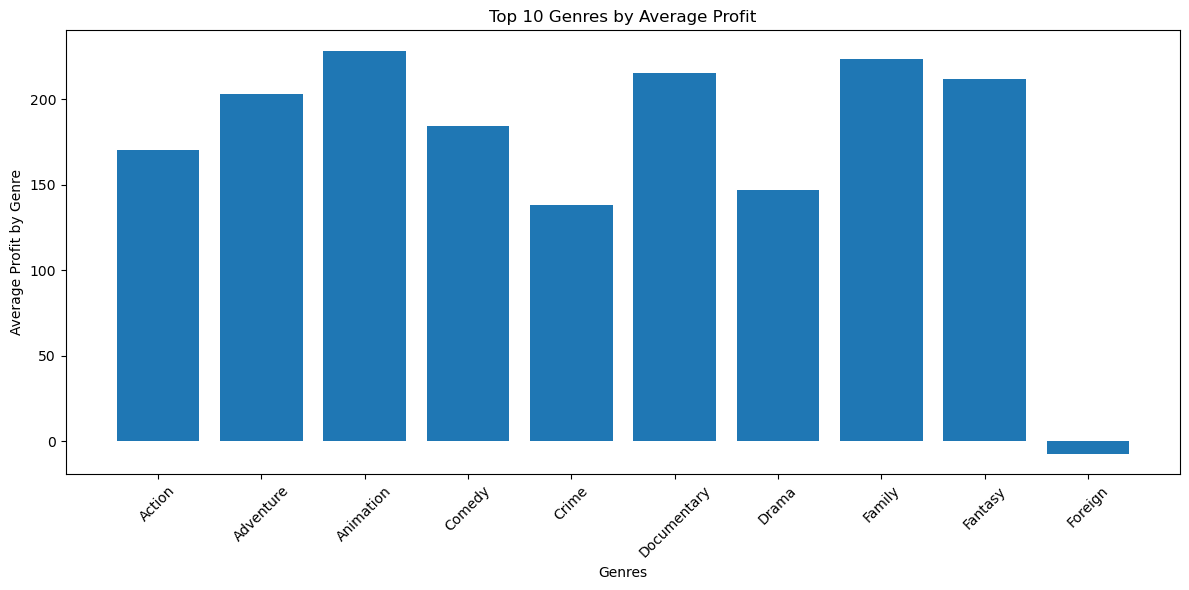

In [ ]:
avg_profit_by_genre_df = final_profitability_by_genre_df.head(10)

plt.figure(figsize = (12,6))
plt.bar(avg_profit_by_genre_df["Genres"], (avg_profit_by_genre_df["Profit / Loss %"]))
plt.xlabel("Genres")
plt.ylabel("Average Profit by Genre")
plt.title("Top 10 Genres by Average Profit")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()